# DS 3000 - Assignment 11

**Student Name**: Ala'a Tamam

**Date**: 11/20/2023


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

Create a SVM classifier to predict the onset of diabetes using the Pima Indians Diabetes Database. Information on the Pima Indians Diabetes Database Links to an external site. can be obtained directly from kaggle.com. The link also contains the description of each field in the dataset.

## Question 1: 

Load the dataset “diabetes.csv”, view the dimensions of the data, and gather summary statistics. Comment on your observations about the data.

In [1]:
import pandas as pd

df = pd.read_csv("diabetes.csv")

num_rows, num_columns = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

summary_stats = df.describe()

print(summary_stats)


Number of rows: 768
Number of columns: 9
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476

### observations about the data:
When looking at the summary the first thing I noticed was impossible values for things like glucose, blood pressure, skin thickness, insulin, and bmi. This flagged that when performing data cleaning i would need to make sure I impute or drop those zero values. I also noticed that the outcome, which is binary (which is nice) has a mean of .35 meaning that of the dataset only 35 percent of the participants had diabetes, which leads me to wonder if the model will get good at telling who doesnt have diabetes but maybe struggle telling who does. I was also interested in skin thickness, which is mean to be a supplemental mean to measure body fat, I work in a pharmacy and as the medical industry trys to push away from BMI, we have started to see other mechanisms of measuring body fat and this was a new and interesting one. 


## Question 2: 
 Create two visualizations that demonstrate univariate and/or pairwise patterns in the data. Comment on the patterns.

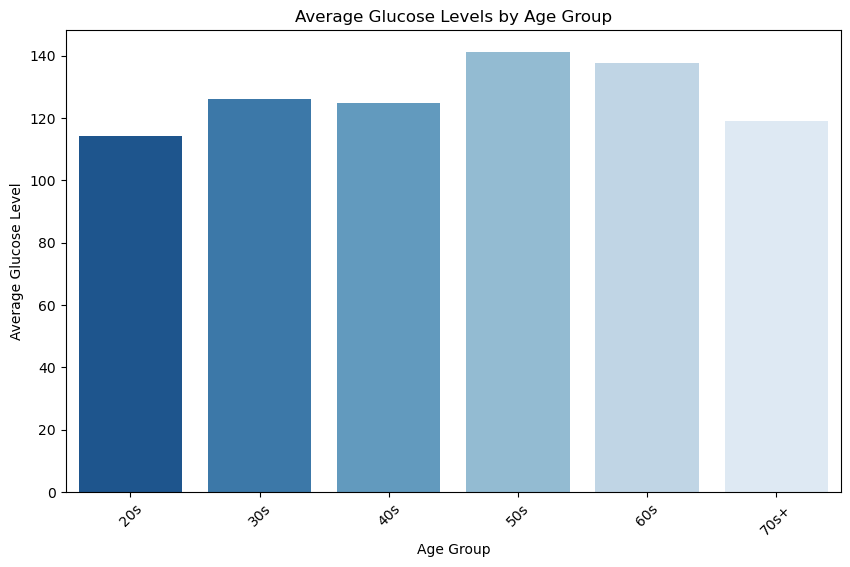

In [2]:
## analyzing the relationship between age groups and glucose levels:
import seaborn as sns
import matplotlib.pyplot as plt

age_bins = [20, 30, 40, 50, 60, 70, 80]
age_labels = ['20s', '30s', '40s', '50s', '60s', '70s+']

df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

average_glucose_by_age = df.groupby('AgeGroup')['Glucose'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=average_glucose_by_age, x='AgeGroup', y='Glucose', palette='Blues_r')
plt.title("Average Glucose Levels by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Glucose Level")
plt.xticks(rotation=45)
plt.show()


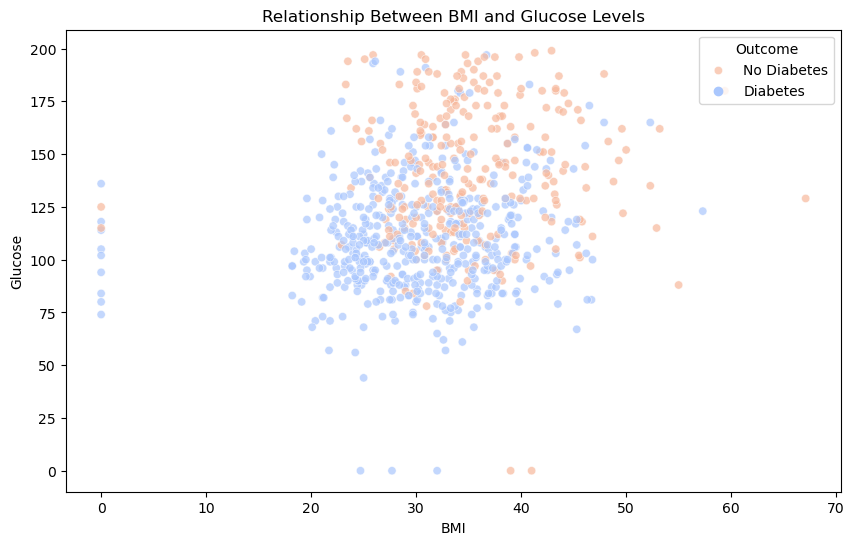

In [3]:
## Analyzing relationship between different BMIs and glucose levels
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='BMI', y='Glucose', alpha=0.7, hue='Outcome', palette='coolwarm')
plt.title("Relationship Between BMI and Glucose Levels")
plt.xlabel("BMI")
plt.ylabel("Glucose")
plt.legend(title='Outcome', loc='upper right', labels=['No Diabetes', 'Diabetes'])
plt.show()


### Commentary on Results
- The first chart shows the relationship between different age groups and their average glucose levels. This chart shows that glucose levels reach their peak when the subjects were in their 50's and 60's and the began to decrease after that. This tells me that age is a feature that should be kept in because there seems to be a slight correlation between age and glucose levels. 
- the second chart shows the relationship between the subjects BMIs and their glucose, with the dots indicating if they had diabetes. This scatterplot did not show any extreme correlation between the subjects bmis and their glucose levels nor if they had diabetes or not. 

## Question 3:
Evaluate the data for missing or invalid values. Then prepare the data, and ensure that you handle missing and invalid values (if they exist).

In [4]:
import numpy as np

columns_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
zero_values_count = {column: (df[column] == 0).sum() for column in columns_to_check}
print("Zero values in each column before fixing:\n", zero_values_count)

df[columns_to_check] = df[columns_to_check].replace(0, np.nan)

for column in columns_to_check:
    df[column].fillna(df[column].median(), inplace=True)

invalid_glucose = (df['Glucose'] <= 0).sum()
invalid_bmi = (df['BMI'] <= 0).sum()
invalid_age = (df['Age'] <= 0).sum()
invalid_bloodpressure = (df['BloodPressure'] <= 0).sum()
invalid_skinthickness = (df['SkinThickness'] <= 0).sum()
invalid_insulin = (df['Insulin'] <= 0).sum()

# Print the counts
print("Invalid or zero values after imputing:")
print(f"Glucose: {invalid_glucose}, BMI: {invalid_bmi}, Age: {invalid_age}, "
      f"BloodPressure: {invalid_bloodpressure}, SkinThickness: {invalid_skinthickness}, "
      f"Insulin: {invalid_insulin}")



Zero values in each column before fixing:
 {'Glucose': 5, 'BloodPressure': 35, 'SkinThickness': 227, 'Insulin': 374, 'BMI': 11}
Invalid or zero values after imputing:
Glucose: 0, BMI: 0, Age: 0, BloodPressure: 0, SkinThickness: 0, Insulin: 0


## Question 4:
Partition the data into train/test sets. After which, perform the following:
encode any categorical data
normalize numeric data. Tip: Ensure that you use sklearn to normalize and/or encode the training data, after which transform the test set (there is an example in the lecture).

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# I didnt see any categorical data in the dataset 

            
selected_features = [ 'Glucose', 'Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin',
                       'BMI', 'DiabetesPedigreeFunction', 'Age']

X = df[selected_features]
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()

X_train_normalized = scaler.fit_transform(X_train)

X_test_normalized = scaler.transform(X_test)

## Question 5:
 Build the model that predicts the target variable. Ensure that you:
Instantiate the correct SVM model, train and evaluate it.
Use GridSearchCV to tune at least two hyperparameters.**
Perform cross validation.
**You'll need to read the documentation of the SVM algorithm to identify the hyperparameters.
Display: 1) the best model/parameters and 2) the best score that was obtained.

In [7]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

svm_classifier = SVC()

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1],
    'degree': [2, 3, 4],
    'shrinking': [True, False],
    'probability': [True, False]
}

grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_normalized, y_train)

best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test_normalized)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

training_accuracy = best_svm_model.score(X_train_normalized, y_train)

print("Best Model/Parameters:")
print(best_params)
print("\nBest Score (Cross-Validation Accuracy):")
print(best_score)
print("\nModel Evaluation:")
print("Accuracy:", accuracy)
print(f"Training Set Accuracy: {training_accuracy}")
print("\nClassification Report:")
print(report)


Best Model/Parameters:
{'C': 10, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True, 'shrinking': True}

Best Score (Cross-Validation Accuracy):
0.7703985072637611

Model Evaluation:
Accuracy: 0.7662337662337663
Training Set Accuracy: 0.7768729641693811

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154



## Question 6:
Evaluate the scores from GridSearchCV for the training set and the test set to diagnose any bias-variance problems. Comment on the quality of the model. Did it accurately predict the target? Do you think the prediction from this model is useful and would you advocate for its use in the medical industry?


1. Evaluate the scores from GridSearchCV for the training set and the test set to diagnose any bias-variance problems
    - The training set score I got while doing hyperparameter tuning was approximentally 77 percent. This score is ok. It shows that the model can identify relationships/patterns within the training data. The test set accuracy was approximentally 76.62 percent, which suggest that the model adapts relatively well to the new and unseen data. The score is also similar to the training set, indicating that the model isnt significantly overfit to the training set. 
2. Comment on the quality of the model. Did it accurately predict the target?
    - the model had a relatively good performance with an accuracy of 77 after some feature engineering, on the test set. This shows that the model is able to distinguish between diabetic and non-diabetic individuals. 
    
1b & 2b. Bias-variance problems:
    - The similarity between the training and the test set scores indicate a balanced bias-variance trade off. The model isnt super underfit, nor super overfit. However, its importnt to continue training the model, so we cn gather addition insight into the bias-variance trade offs. 
3. Do you think the prediction from this model is useful and would you advocate for its use in the medical industry?
    - While this tool in theory has widespread positive implications, I would not advocate for it use at this stage, in the medical industry. In medicine any data or tools that influence decision making must have extremely high levels of accuracy, if I were to suggest that the predictions made from the model be implemented in the medical industry, I would feel liable for any intepretation of results that led to a casualty. In medicine there needs to be an extremely high degree of accuracy that this model may one day contain, but does not yet posess. 

## Helpful resources 
Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment inside the code cell, or you can list them below. 

You do not need to cite the official python documentation.
